In [2]:
import numpy as np

def sen2vec_fasttext(model, tokens, embedding_dim = 100):
    ## 문장 token 리스트를 받아서 임베딩을 시킨다. 
    
    size = len(tokens)
    matrix = np.zeros((size, embedding_dim))
    
    for idx, token in enumerate(tokens):
        vector = np.array([
            model.wv[t] for t in token
        ])
        
        final_vector = np.mean(vector, axis = 0)
        matrix[idx] = final_vector
    return matrix

In [4]:
import pickle
list_ex_load = []
# !pip install gensim
from gensim.models.fasttext import FastText

with open("../3_Tokenizing/list_sentences.pkl","rb") as f:
    list_ex_load = pickle.load(f)

fast_text_model = FastText.load('../4_Word_Embedding/fasttext.model')

In [6]:
setnece_matrix = sen2vec_fasttext(fast_text_model, list_ex_load)
setnece_matrix.shape

(153719, 100)

In [7]:
np.save('./sentence_matrix.npy', setnece_matrix)

In [8]:
# sklearn
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import pandas as pd 
class_list = pd.read_excel("../2_Preprocess/filtered_data.xlsx")["class"].to_list()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 153719 samples in 0.022s...
[t-SNE] Computed neighbors for 153719 samples in 522.260s...
[t-SNE] Computed conditional probabilities for sample 1000 / 153719
[t-SNE] Computed conditional probabilities for sample 2000 / 153719
[t-SNE] Computed conditional probabilities for sample 3000 / 153719
[t-SNE] Computed conditional probabilities for sample 4000 / 153719
[t-SNE] Computed conditional probabilities for sample 5000 / 153719
[t-SNE] Computed conditional probabilities for sample 6000 / 153719
[t-SNE] Computed conditional probabilities for sample 7000 / 153719
[t-SNE] Computed conditional probabilities for sample 8000 / 153719
[t-SNE] Computed conditional probabilities for sample 9000 / 153719
[t-SNE] Computed conditional probabilities for sample 10000 / 153719
[t-SNE] Computed conditional probabilities for sample 11000 / 153719
[t-SNE] Computed conditional probabilities for sample 12000 / 153719
[t-SNE] Computed conditional prob

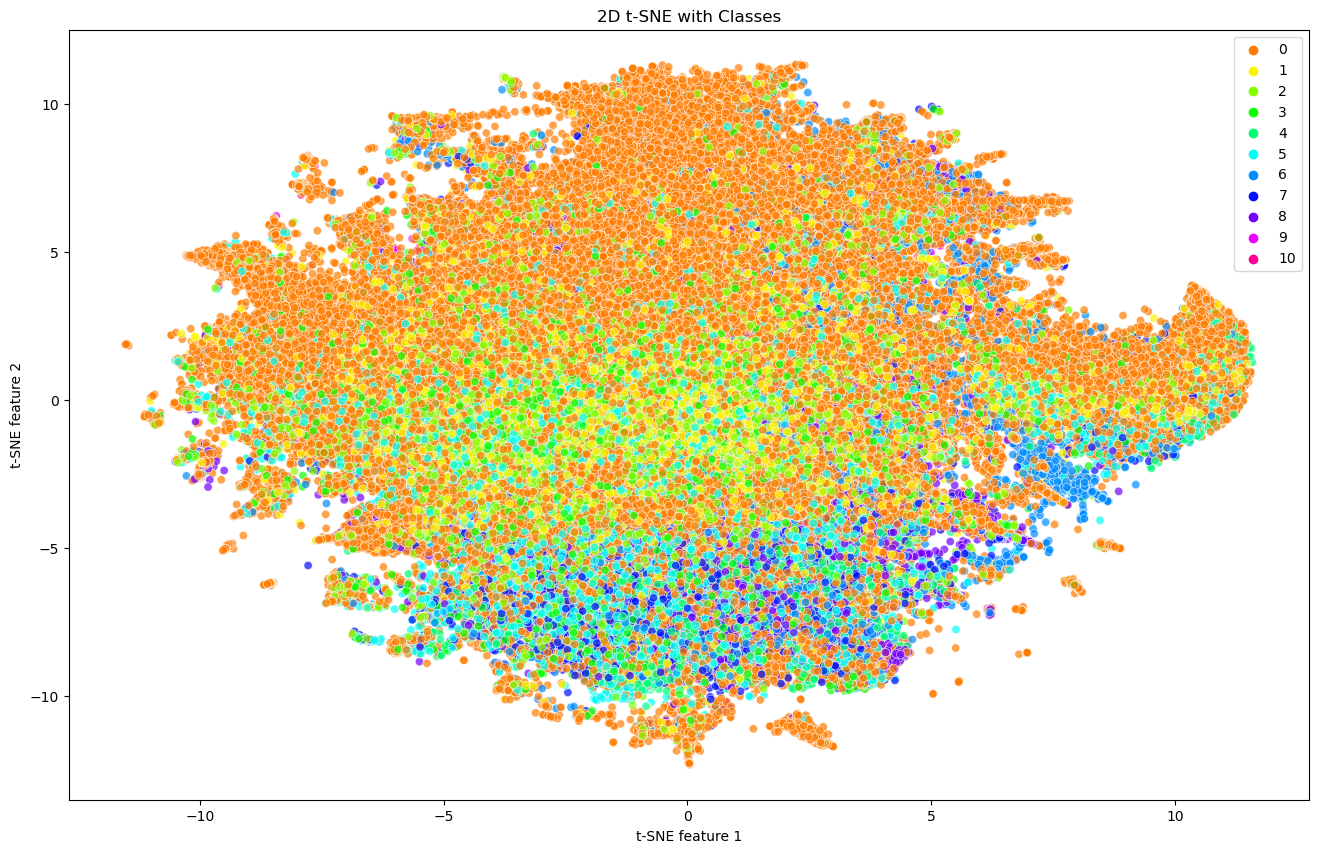

In [10]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 가정: 'vectors'는 (146936, 100) 차원의 벡터들, 'classes'는 각 벡터의 클래스 라벨
vectors = setnece_matrix # 여기에 100차원 벡터 데이터를 입력하세요
classes =  class_list # 여기에 해당 벡터의 클래스 라벨(0에서 10 사이의 값)을 입력하세요

# t-SNE 임베딩 수행
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
vectors_tsne = tsne.fit_transform(vectors)

# 시각화
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x=vectors_tsne[:, 0], y=vectors_tsne[:, 1],
    hue=classes,
    palette=sns.color_palette("hsv", 11),
    legend="full",
    alpha=0.7
)

plt.title('2D t-SNE with Classes')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60331 samples in 0.009s...
[t-SNE] Computed neighbors for 60331 samples in 77.545s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60331
[t-SNE] Computed conditional probabilities for sample 2000 / 60331
[t-SNE] Computed conditional probabilities for sample 3000 / 60331
[t-SNE] Computed conditional probabilities for sample 4000 / 60331
[t-SNE] Computed conditional probabilities for sample 5000 / 60331
[t-SNE] Computed conditional probabilities for sample 6000 / 60331
[t-SNE] Computed conditional probabilities for sample 7000 / 60331
[t-SNE] Computed conditional probabilities for sample 8000 / 60331
[t-SNE] Computed conditional probabilities for sample 9000 / 60331
[t-SNE] Computed conditional probabilities for sample 10000 / 60331
[t-SNE] Computed conditional probabilities for sample 11000 / 60331
[t-SNE] Computed conditional probabilities for sample 12000 / 60331
[t-SNE] Computed conditional probabilities for s

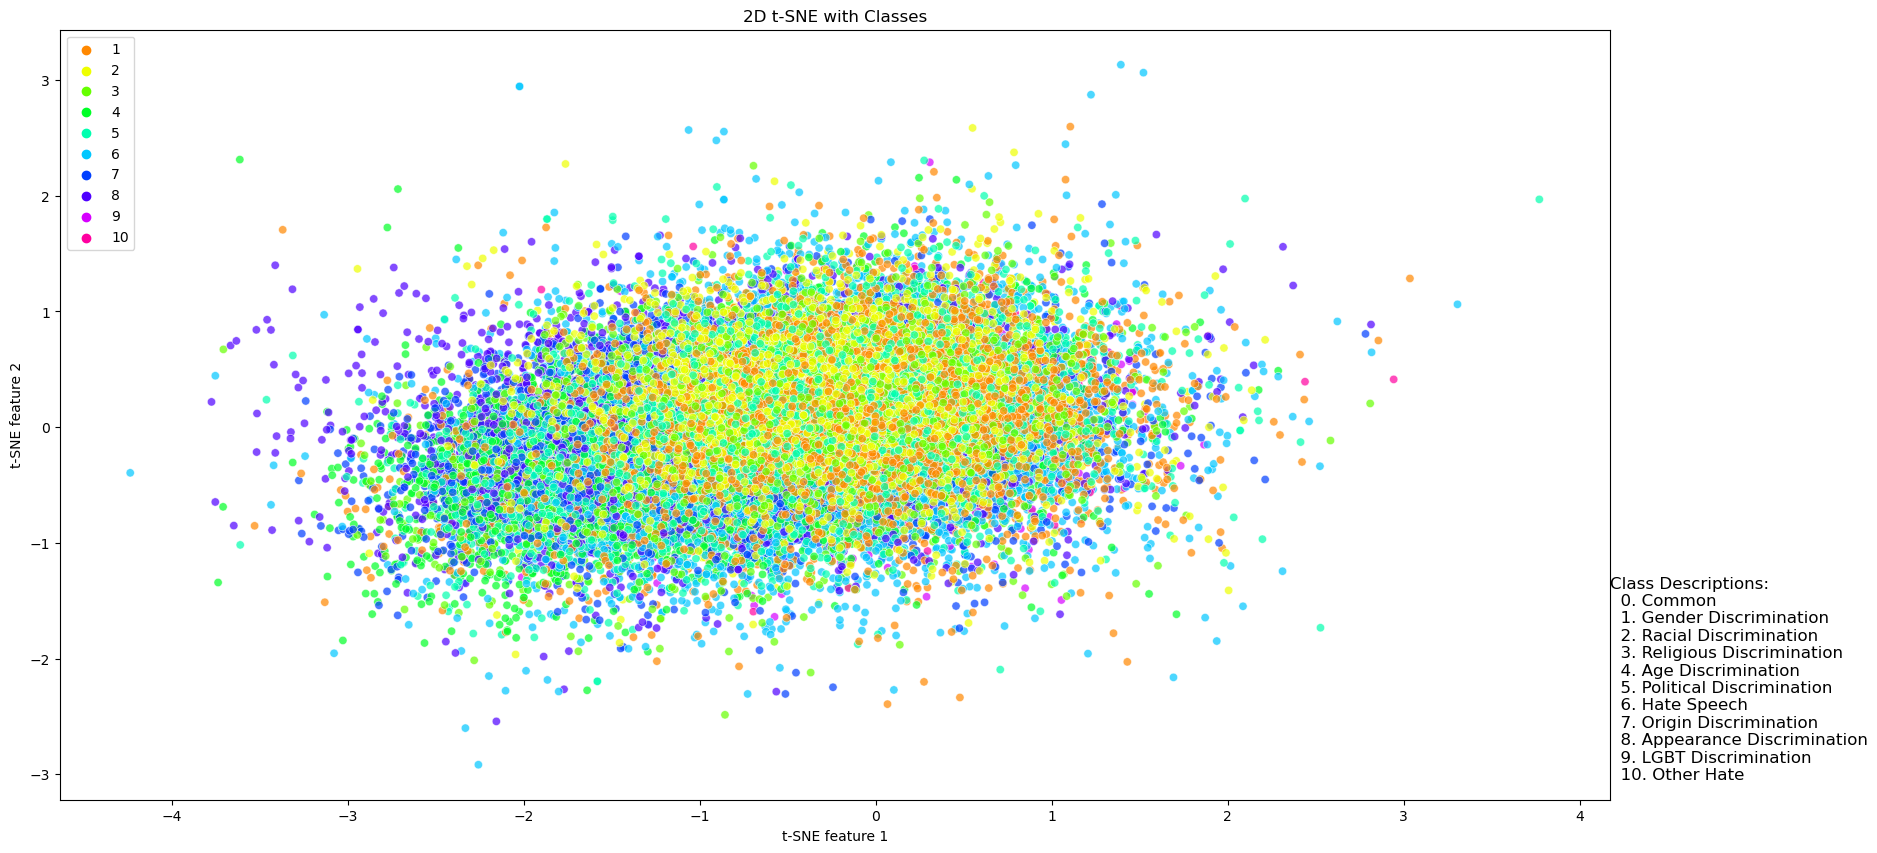

In [11]:
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# 가정: 'vectors'는 (146936, 100) 차원의 벡터들, 'classes'는 각 벡터의 클래스 라벨
vectors = setnece_matrix # 여기에 100차원 벡터 데이터를 입력하세요
classes =  class_list # 여기에 해당 벡터의 클래스 라벨(0에서 10 사이의 값)을 입력하세요

mask = [label != 0 for label in classes]

filtered_vectors = vectors[mask]
filtered_classes = [label for label in classes if label != 0]


# t-SNE 임베딩 수행
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
vectors_tsne = tsne.fit_transform(filtered_vectors)

# 시각화
plt.figure(figsize=(20, 10))
sns.scatterplot(
    x=filtered_vectors[:, 0], y=filtered_vectors[:, 1],
    hue=filtered_classes,
    palette=sns.color_palette("hsv", 10),
    legend="full",
    alpha=0.7
)

plt.title('2D t-SNE with Classes')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# 설명 텍스트 추가
description = """
Class Descriptions:
  0. Common
  1. Gender Discrimination
  2. Racial Discrimination
  3. Religious Discrimination
  4. Age Discrimination
  5. Political Discrimination
  6. Hate Speech
  7. Origin Discrimination
  8. Appearance Discrimination
  9. LGBT Discrimination
  10. Other Hate
"""
# 그래프 오른쪽에 설명 추가
plt.text(plt.xlim()[1], plt.ylim()[0], description, fontsize=12, verticalalignment='bottom')

plt.show()